In [0]:
from matplotlib import pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [3]:
!pip3 install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=64b161089ff1f86c2fc92263f9770f98dd56ad5e3b8b8c551eb18da12fd7a934
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [4]:
!wget https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/RegressaoLinear/FuelConsumptionCo2.csv

--2020-06-08 21:19:48--  https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/RegressaoLinear/FuelConsumptionCo2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/plain]
Saving to: ‘FuelConsumptionCo2.csv’

FuelConsumptionCo2. 100%[===================>]  70.93K  --.-KB/s    in 0.03s   

2020-06-08 21:19:49 (2.39 MB/s) - ‘FuelConsumptionCo2.csv’ saved [72629/72629]



In [0]:
df = pd.read_csv("FuelConsumptionCo2.csv")

In [7]:
print(df.head())

   MODELYEAR   MAKE  ... FUELCONSUMPTION_COMB_MPG CO2EMISSIONS
0       2014  ACURA  ...                       33          196
1       2014  ACURA  ...                       29          221
2       2014  ACURA  ...                       48          136
3       2014  ACURA  ...                       25          255
4       2014  ACURA  ...                       27          244

[5 rows x 13 columns]


In [8]:
df. describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [11]:
motores = df[['ENGINESIZE']]
co2 = df[['CO2EMISSIONS']]
print(motores.head())

   ENGINESIZE
0         2.0
1         2.4
2         1.5
3         3.5
4         3.5


In [12]:
motores_treino, motores_teste, co2_treino, co2_teste = train_test_split(motores, co2, test_size=0.2, random_state=42)
print(type(motores_treino))

<class 'pandas.core.frame.DataFrame'>


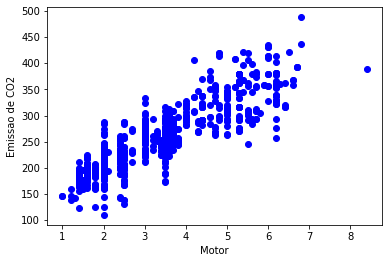

In [13]:
plt.scatter(motores_treino,co2_treino,color='blue')
plt.xlabel('Motor')
plt.ylabel('Emissao de CO2')
plt.show()

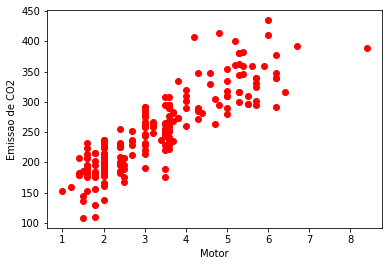

In [14]:
plt.scatter(motores_teste,co2_teste,color='red')
plt.xlabel('Motor')
plt.ylabel('Emissao de CO2')
plt.show()

In [15]:
modelo = linear_model.LinearRegression()

modelo.fit(motores_treino,co2_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print('(A Intercepto: ',modelo.intercept_)
print('(B) Inclinação: ',modelo.coef_)


(A Intercepto:  [126.28970217]
(B) Inclinação:  [[38.99297872]]


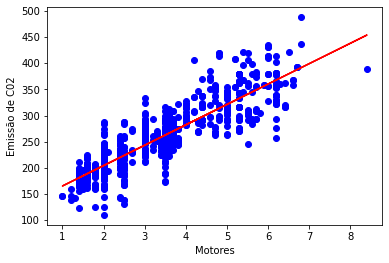

In [17]:
plt.scatter(motores_treino,co2_treino,color="blue")
plt.plot(motores_treino, modelo.coef_[0][0]*motores_treino + modelo.intercept_[0], '-r')
plt.ylabel("Emissão de C02")
plt.xlabel("Motores")
plt.show()

In [0]:
predicoesCo2 = modelo.predict(motores_teste)

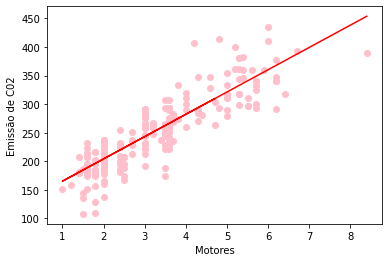

In [23]:
plt.scatter(motores_teste, co2_teste, color='pink')
plt.plot(motores_teste, modelo.coef_[0][0]*motores_teste + modelo.intercept_[0], '-r')
plt.ylabel("Emissão de C02")
plt.xlabel("Motores")
plt.show()

In [24]:
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((predicoesCo2 - co2_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(co2_teste, predicoesCo2))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(co2_teste, predicoesCo2))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(co2_teste, predicoesCo2)))
print("R2-score: %.2f" % r2_score(predicoesCo2 , co2_teste) )


Soma dos Erros ao Quadrado (SSE): 210991 
Erro Quadrático Médio (MSE): 985.94
Erro Médio Absoluto (MAE): 24.10
Raiz do Erro Quadrático Médio (RMSE): 31.40 
R2-score: 0.68
